# Fraudulent Transaction Detection with Machine Learning Technique

## Tasks that are already done on Google BigQuery
- Encoding of categorical data

- Data Normalisation

- Splitting data to train valid test in 80/20/10

- Feature Engineering on adding extra columns

## Tasks that are perform here in Google Colab
- Remove Missing Values

- Data Visualisations

- handling Class Imbalance

- Train data

- Hyperparameter Tuning

- Model Testing

- Deep Learning Approach on model testing

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
from scipy.stats import zscore
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, log_loss,classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np



In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/GDG Study Jam 1/normalized_numerics.csv')

## Remove Missing Values

In [6]:
missing_values = df.isnull().sum()
print(f"missing values: {missing_values}")

missing values: Unnamed: 0                          0
session_length_in_minutes           0
credit_risk_score                   0
intended_balcon_amount              0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
proposed_credit_limit               0
date_of_birth_distinct_emails_4w    0
customer_age                        0
prev_address_months_count           0
current_address_months_count        0
bank_months_count                   0
month                               0
income                              0
name_email_similarity               0
days_since_request                  0
device_fraud_count                  0
device_distinct_emails_8w           0
device_os_encoded                   0
source_encoded                      0
fraud_bool                          0
email_is_free                       0
phone_home_valid                  

In [ ]:

# Print number of rows before dropping missing values
print(f"Number of rows before: {df.shape[0]}")

# Remove rows with missing values
df = df.dropna()

# Print number of rows after dropping missing values
print(f"Number of rows after: {df.shape[0]}")



Number of rows before: 485397
Number of rows after: 485397


## Data Visualisations

<ipython-input-9-014919bdff6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_bool', y='income', palette='Set2')


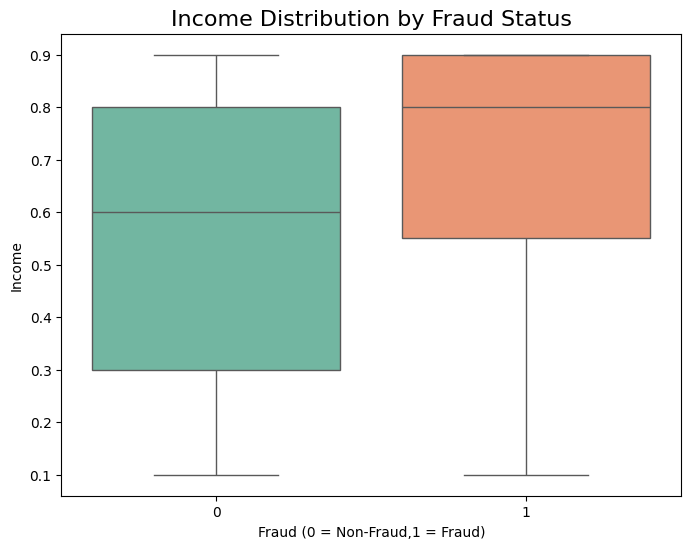

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='fraud_bool', y='income', palette='Set2')
plt.title('Income Distribution by Fraud Status', fontsize=16)
plt.xlabel('Fraud (0 = Non-Fraud,1 = Fraud)')
plt.ylabel('Income')
plt.show()


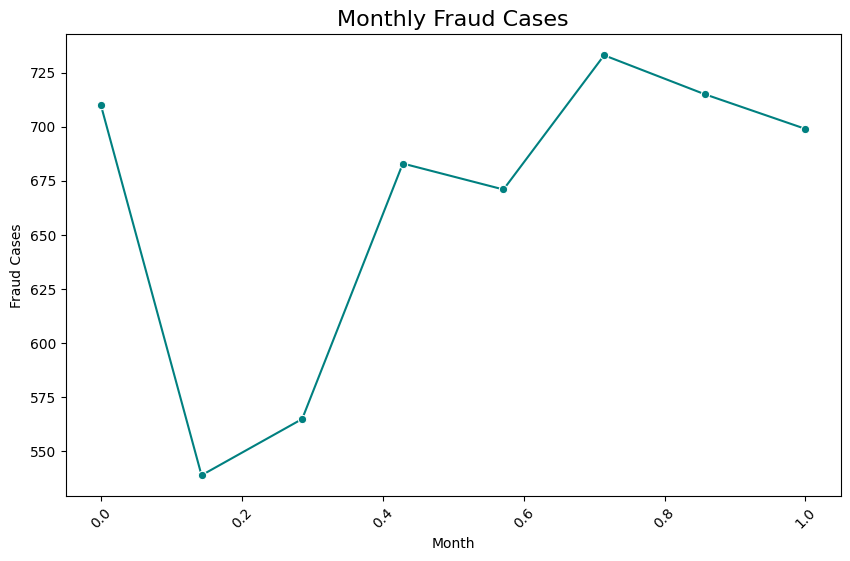

In [ ]:
monthly_fraud = df.groupby('month')['fraud_bool'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_fraud, x='month', y='fraud_bool', marker='o', color='teal')
plt.title('Monthly Fraud Cases', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Fraud Cases')
plt.xticks(rotation=45)
plt.show()

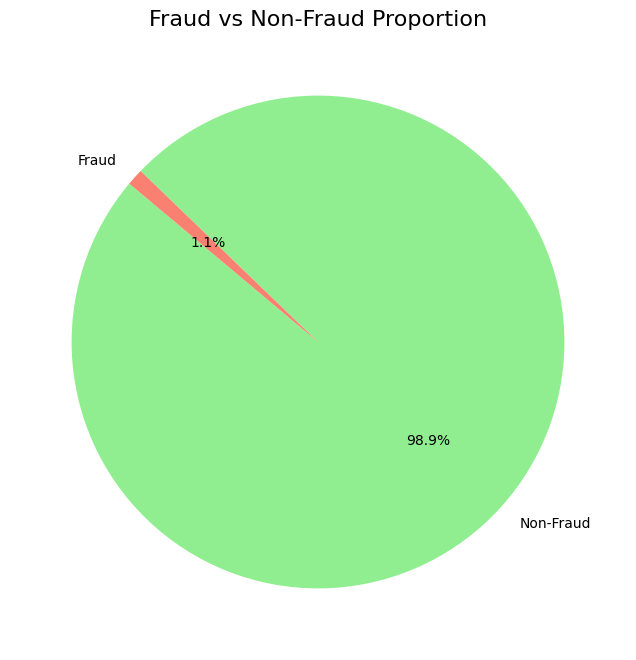

In [ ]:
fraud_counts = df['fraud_bool'].value_counts()
labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
plt.title('Fraud vs Non-Fraud Proportion', fontsize=16)
plt.show()

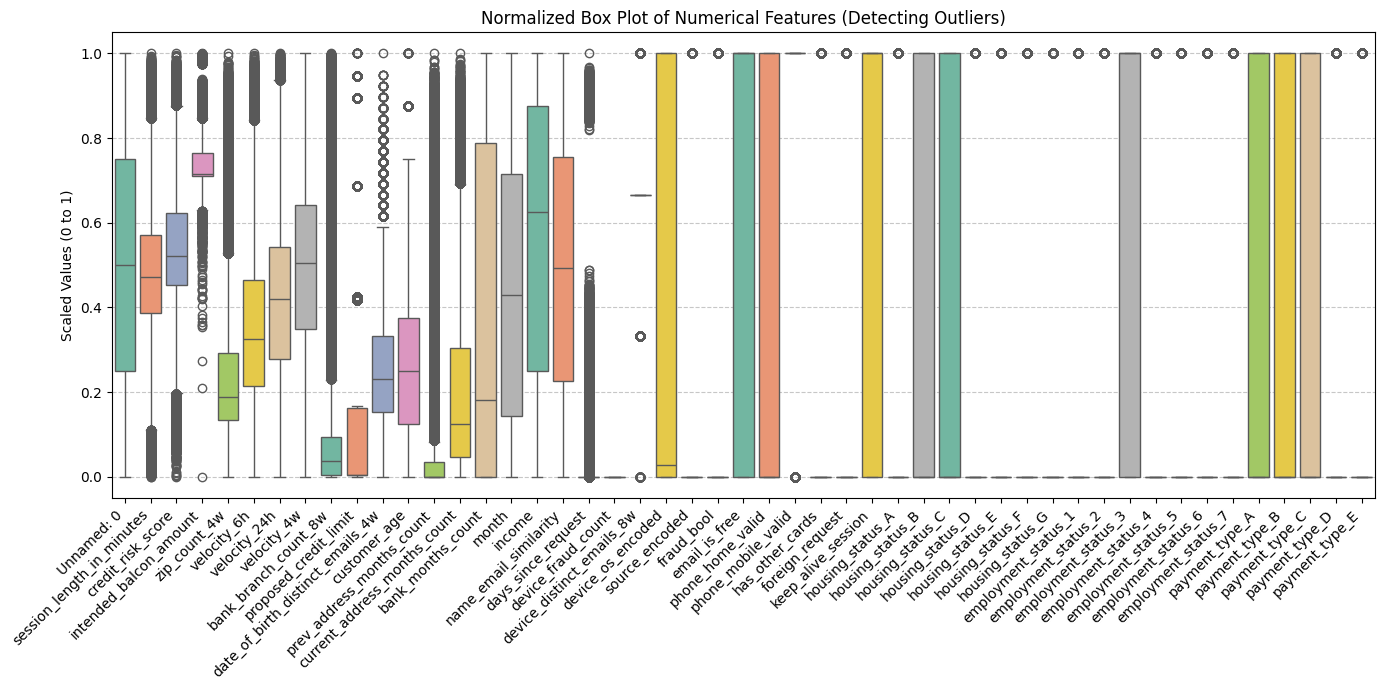

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# Plot the normalized box plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_normalized, orient='v', palette='Set2')

# Customize plot appearance
plt.title('Normalized Box Plot of Numerical Features (Detecting Outliers)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Scaled Values (0 to 1)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


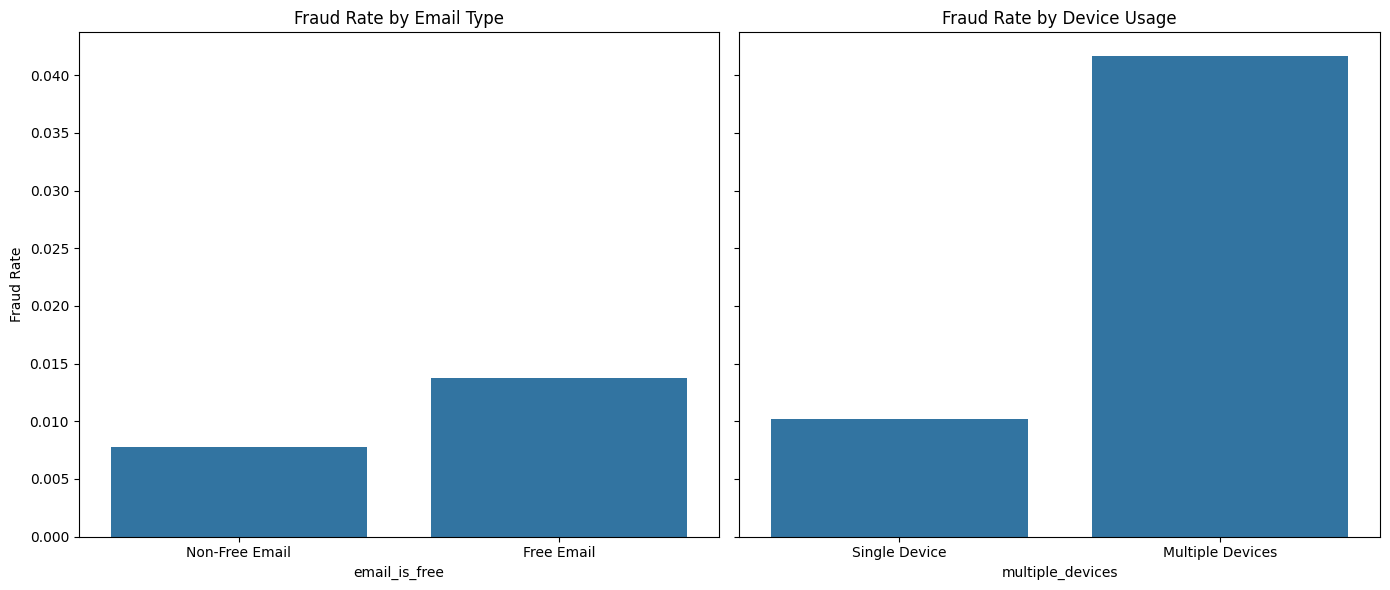

In [ ]:
df["fraud"] = df["fraud_bool"] > 0  # Fraud indicator (binary)
df["multiple_devices"] = df["device_distinct_emails_8w"] > 1  # Multiple devices indicator

# Calculate fraud rates
email_fraud_rate = df.groupby("email_is_free")["fraud"].mean()
device_fraud_rate = df.groupby("multiple_devices")["fraud"].mean()

# Set up the plot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Fraud rate by email type
sns.barplot(x=email_fraud_rate.index, y=email_fraud_rate.values, ax=axes[0])
axes[0].set_title("Fraud Rate by Email Type")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Non-Free Email", "Free Email"])
axes[0].set_ylabel("Fraud Rate")

# Fraud rate by device usage
sns.barplot(x=device_fraud_rate.index, y=device_fraud_rate.values, ax=axes[1])
axes[1].set_title("Fraud Rate by Device Usage")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Single Device", "Multiple Devices"])
axes[1].set_ylabel("Fraud Rate")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('/content/drive/My Drive/Normalized Numerics/normalized_numerics.csv')

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'session_length_in_minutes', 'credit_risk_score',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w', 'proposed_credit_limit',
       'date_of_birth_distinct_emails_4w', 'customer_age',
       'prev_address_months_count', 'current_address_months_count',
       'bank_months_count', 'month', 'income', 'name_email_similarity',
       'days_since_request', 'device_fraud_count', 'device_distinct_emails_8w',
       'device_os_encoded', 'source_encoded', 'fraud_bool', 'email_is_free',
       'phone_home_valid', 'phone_mobile_valid', 'has_other_cards',
       'foreign_request', 'keep_alive_session', 'housing_status_A',
       'housing_status_B', 'housing_status_C', 'housing_status_D',
       'housing_status_E', 'housing_status_F', 'housing_status_G',
       'employment_status_1', 'employment_status_2', 'employment_status_3',
       'employment_status_4', 'employment_status_5', 'employment_status_6',


## Read dataset from drive after Feature Engineering

In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/GDG Study Jam 1/fraud_train_feng_final.csv')
valid_df = pd.read_csv('/content/drive/My Drive/GDG Study Jam 1/fraud_valid_feng_final.csv')
test_df = pd.read_csv('/content/drive/My Drive/GDG Study Jam 1/fraud_test_final2.csv')

In [ ]:

fraud_count = train_df[train_df['fraud_bool']==1].shape[0]
non_fraud_count =train_df[train_df['fraud_bool']==0].shape[0]
print(f"Number of fraud cases: {fraud_count}")
print(f"Number of non fraud cases: {non_fraud_count}")

Number of fraud cases: 3720
Number of non fraud cases: 336318


## Handling Class Imbalance

In [ ]:
X = train_df.drop('fraud_bool', axis = 1)
y = train_df['fraud_bool']

In [ ]:
# Step 1: Random Undersampling (reduce majority class)
under_sampler = RandomUnderSampler(sampling_strategy=0.4, random_state=42)  # Adjust ratio as needed
X_under, y_under = under_sampler.fit_resample(X, y)

# Step 2: SMOTE Oversampling (balance classes)
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Make classes fully balanced
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

print("Original class distribution:", dict(pd.Series(y).value_counts()))
print("After undersampling:", dict(pd.Series(y_under).value_counts()))
print("After SMOTE:", dict(pd.Series(y_resampled).value_counts()))


Original class distribution: {0: np.int64(336318), 1: np.int64(3720)}
After undersampling: {0: np.int64(9300), 1: np.int64(3720)}
After SMOTE: {0: np.int64(9300), 1: np.int64(9300)}


In [ ]:

# Apply SMOTE first to generate synthetic samples for minority class
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Adjust to avoid over-generation
X_smote, y_smote = smote.fit_resample(X, y)

# Apply random undersampling to reduce class 0 slightly
under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Adjust ratio
X_resampled, y_resampled = under_sampler.fit_resample(X_smote, y_smote)

print("Original class distribution:", dict(pd.Series(y).value_counts()))
print("After SMOTE:", dict(pd.Series(y_smote).value_counts()))
print("After Undersampling:", dict(pd.Series(y_resampled).value_counts()))


Original class distribution: {0: np.int64(336318), 1: np.int64(3720)}
After SMOTE: {0: np.int64(336318), 1: np.int64(67263)}
After Undersampling: {0: np.int64(134526), 1: np.int64(67263)}


In [ ]:
# Combine the resampled features (X) and target (y) into one DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)


## Remove High Correlation Feature


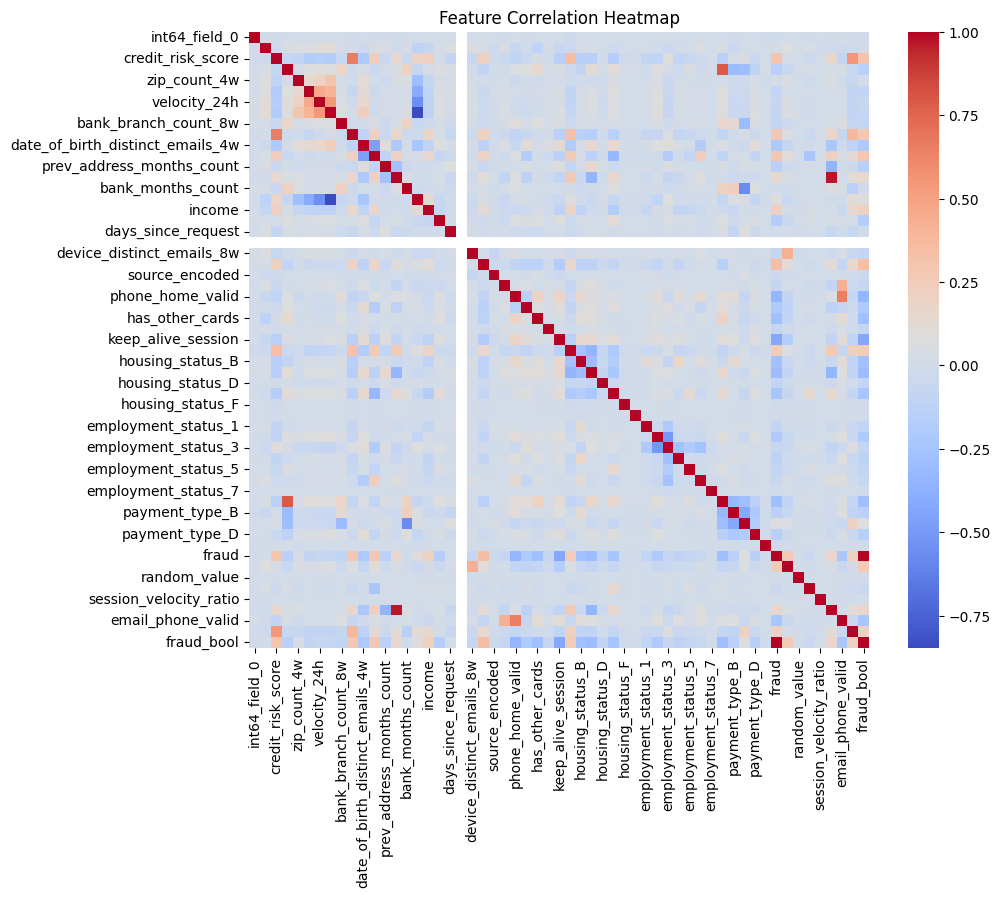

In [ ]:
# Compute the correlation matrix
corr_matrix = df_resampled.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
import numpy as np

# Compute the correlation matrix
corr_matrix = df_resampled.corr().abs()  # Use absolute values to check both + and - correlations

# Select upper triangle of correlation matrix to avoid duplicate values
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


In [ ]:
# Find features with correlation higher than 0.8
highly_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

print("Highly correlated features to consider removing:", highly_corr_features)


Highly correlated features to consider removing: ['month', 'address_permanency', 'fraud_bool']


In [ ]:

df_cleaned = df_resampled.drop(['month', 'address_permanency','fraud'], axis=1)
valid_df_cleaned = valid_df.drop(['month', 'address_permanency','fraud'], axis=1)
test_df = test_df.drop(['month', 'address_permanency','fraud'], axis=1)\

print("New dataset shape after removing correlated features:", df_cleaned.shape)


New dataset shape after removing correlated features: (201789, 54)


##Train Data


In [ ]:
X_train = df_cleaned.drop(columns=['fraud_bool'])
y_train = df_cleaned[['fraud_bool']]
X_valid = valid_df_cleaned.drop(columns=['fraud_bool'])
y_valid = valid_df_cleaned[['fraud_bool']]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_valid_scaled = scaler.transform(X_valid)  # Transform test data


In [ ]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)
y_pred_logistic = log_reg_model.predict(X_valid_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f"Logistic Regression Model's Accuracy: {accuracy_score(y_valid, y_pred_logistic)} \n") #this will output the accuracy of predictions
print(classification_report(y_valid, y_pred_logistic)) #this will print the preicision, recall and F1-score


Logistic Regression Model's Accuracy: 0.9718589637477238 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     95558
           1       0.14      0.29      0.19      1098

    accuracy                           0.97     96656
   macro avg       0.57      0.64      0.59     96656
weighted avg       0.98      0.97      0.98     96656



In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 1) #creating a random forest model with 100 decision trees for now
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_valid)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print(f"Random Forest Model's Accuracy: {accuracy_score(y_valid, y_pred_random_forest)} \n")
print(classification_report(y_valid, y_pred_random_forest))

Random Forest Model's Accuracy: 0.9947752855487502 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95558
           1       0.83      0.68      0.75      1098

    accuracy                           0.99     96656
   macro avg       0.91      0.84      0.87     96656
weighted avg       0.99      0.99      0.99     96656



In [ ]:
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_valid)

In [ ]:
print(f"XGBoost Model's Accuracy: {accuracy_score(y_valid, y_pred_xgb)} \n")
print(classification_report(y_valid, y_pred_xgb))

XGBoost Model's Accuracy: 0.9883400926998841 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     95558
           1       0.46      0.17      0.25      1098

    accuracy                           0.99     96656
   macro avg       0.73      0.59      0.62     96656
weighted avg       0.98      0.99      0.99     96656



## Hyperparameter Tuning

In [ ]:
param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [10,15,20]  # Try deeper trees

}

grid_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring="recall",  # Optimize for recall instead of accuracy
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 15, 'n_estimators': 100}


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,max_depth=15)

model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

print(classification_report(y_pred, y_valid))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     94865
           1       0.34      0.21      0.25      1791

    accuracy                           0.98     96656
   macro avg       0.66      0.60      0.62     96656
weighted avg       0.97      0.98      0.98     96656



## Model Testing

In [ ]:

# Load test data (assuming test_df is already loaded)
X_test = test_df.drop(columns=['fraud_bool'])  # Drop target column
y_test = test_df['fraud_bool']  # Extract target column

# Use the best trained model (XGBoost, since it performed better)
y_pred = model.predict(X_test)  # If using Random Forest
# y_pred = best_xgb.predict(X_test)  # If using XGBoost

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"🔹 Accuracy on Test Data: {accuracy:.4f}")
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Accuracy on Test Data: 0.9778
🔹 Mean Absolute Error (MAE): 0.0222

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     47940
           1       0.23      0.35      0.28       583

    accuracy                           0.98     48523
   macro avg       0.61      0.67      0.63     48523
weighted avg       0.98      0.98      0.98     48523



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout, Input # Importing layers
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

In [ ]:
model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu',kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), verbose=1)


Epoch 1/100
6306/6306 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.8624 - loss: 0.5960 - val_accuracy: 0.9770 - val_loss: 0.1010
Epoch 2/100
6306/6306 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9454 - loss: 0.1696 - val_accuracy: 0.9760 - val_loss: 0.1088
Epoch 3/100
6306/6306 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.9497 - loss: 0.1541 - val_accuracy: 0.9802 - val_loss: 0.0960
Epoch 4/100
6306/6306 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9504 - loss: 0.1512 - val_accuracy: 0.9794 - val_loss: 0.0952
Epoch 5/100
6306/6306 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9528 - loss: 0.1458 - val_accuracy: 0.9781 - val_loss: 0.1025
Epoch 6/100
6306/6306 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9535 - loss: 0.1440 - val_accuracy: 0.9815 - val_loss: 0.1057
Epoch 7/100
6306/6306 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.9554 - loss: 0.1389 - val_accuracy: 0.9704 - val_loss: 0.1029
Epoch 8/100
6306/6306 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9549 -